In [303]:
#Cargaremos las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, MinMaxScaler

In [304]:
#Leemos el csv y mostramos las primeras filas para ver la estructura
df_bmw = pd.read_csv('bmw_pricing.csv')
df_bmw.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


# 1. ¿Qué columnas eliminaron inicialmente del dataset y por qué?

In [305]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

1.Columnas con muchos nulos (más del 50% faltante):

*   fecha_registro: 2420 valores (50% faltantes).
*    asientos_traseros_plegables: 1452 valores (70% faltantes).


Podemos considerar eliminar asientos_traseros_plegables si no aporta mucho valor o si no podemos imputar de manera lógica.


2.Columnas con nulos moderados:  

*   marca: 3873 valores (20% faltantes).
*   tipo_coche: 3383 valores (30% faltantes).
*   color: 4398 valores (9% faltantes).
*   aire_acondicionado y bluetooth: alrededor del 10% faltante.


Imputar con la moda para variables categóricas como color, tipo_coche, etc.


3. Columnas con pocos nulos (menos del 1%): modelo, km, potencia, tipo_gasolina, volante_regulable, camara_trasera, elevalunas_electrico, precio, fecha_venta.

Imputar con la media/mediana (para numéricas) o eliminar filas (si el porcentaje es muy bajo).

In [306]:
df_bmw.nunique()

,0
marca,1
modelo,76
km,4784
potencia,61
fecha_registro,180
tipo_gasolina,5
color,10
tipo_coche,8
volante_regulable,2
aire_acondicionado,2


marca: 1 valor único → Todos los coches son de la misma marca (BMW). Esta columna no aporta información y podría eliminarse.

In [307]:
#Vamos a ver qué valores distintos hay en cada columna de "asientos_traseros_plegables"
df_bmw['asientos_traseros_plegables'].unique()

array([nan, False, True], dtype=object)

In [308]:
#Cuantas veces aparece cada valor
df_bmw['asientos_traseros_plegables'].value_counts(dropna=False)

,count
asientos_traseros_plegables,
NaN,3391
False,1150
True,302


Dado que la mayoría de los vehículos no tienen asientos traseros plegables, y muchos registros ni siquiera incluyen este dato, es poco probable que esta característica tenga un impacto significativo en el precio.

In [309]:
#Procedo a eliminar las columnas "marca" y "asientos_traseros_plegables"
df_bmw.drop(columns=['marca', 'asientos_traseros_plegables'], inplace=True)

In [310]:
df_bmw

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,True,NaN,True,NaN,11300.0,2018-01-01
1,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,False,True,True,True,69700.0,2018-02-01
2,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,True,False,True,False,10200.0,2018-02-01
3,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,True,True,True,NaN,25100.0,2018-02-01
4,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,True,True,True,33400.0,2018-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,218 Gran Tourer,39743.0,110.0,NaN,diesel,black,NaN,False,True,False,False,False,True,False,14600.0,2018-08-01
4839,218 Active Tourer,49832.0,100.0,2015-06-01,diesel,grey,NaN,False,True,False,False,False,True,True,17500.0,2018-08-01
4840,218 Gran Tourer,19633.0,110.0,2015-10-01,diesel,grey,van,False,True,False,False,False,True,True,17000.0,2018-09-01
4841,218 Active Tourer,27920.0,110.0,2016-04-01,diesel,brown,van,True,True,False,False,False,True,True,22700.0,2018-09-01


# 2. Manejo de nulos, explicar qué se hizo con los nulos por cada columna

In [311]:
#Contar los valores nulos por columna
null_counts = df_bmw.isnull().sum()
null_counts

,0
modelo,3
km,2
potencia,1
fecha_registro,2423
tipo_gasolina,5
color,445
tipo_coche,1460
volante_regulable,4
aire_acondicionado,486
camara_trasera,2


In [312]:
# Revisar porcentaje de valores nulos en cada columna
null_percentage = df_bmw.isnull().sum() / len(df_bmw) * 100
null_percentage

,0
modelo,0.061945
km,0.041297
potencia,0.020648
fecha_registro,50.030973
tipo_gasolina,0.103242
color,9.188520
tipo_coche,30.146603
volante_regulable,0.082593
aire_acondicionado,10.035102
camara_trasera,0.041297


In [313]:
# Combinar número y porcentaje de nulos en un DF
missing_data = pd.DataFrame({
    'Valores Nulos': df_bmw.isnull().sum(),
    'Porcentaje Nulos': (df_bmw.isnull().sum() / len(df_bmw)) * 100
})
missing_data

,Valores Nulos,Porcentaje Nulos
modelo,3,0.061945
km,2,0.041297
potencia,1,0.020648
fecha_registro,2423,50.030973
tipo_gasolina,5,0.103242
color,445,9.188520
tipo_coche,1460,30.146603
volante_regulable,4,0.082593
aire_acondicionado,486,10.035102
camara_trasera,2,0.041297


In [314]:
#modelo (0.06% nulos): Imputar con la moda porque es muy poca cantidad.
df_bmw['modelo'] = df_bmw['modelo'].fillna(df_bmw['modelo'].mode()[0])
print(df_bmw['modelo'].isnull().sum())

0


In [315]:
#km (0.04% nulos): Verificamos si hay valores negativos. No tendria sentido que los hubiera.
df_bmw["km"].describe()

,km
count,4.841000e+03
mean,1.409593e+05
std,6.020853e+04
min,-6.400000e+01
25%,1.028840e+05
50%,1.410800e+05
75%,1.752170e+05
max,1.000376e+06


In [316]:
#sustituir valores negativos por 0 - lo consideramos error en los datos.
df_bmw.loc[df_bmw["km"] < 0, "km"] = 0

<Axes: xlabel='precio', ylabel='km'>

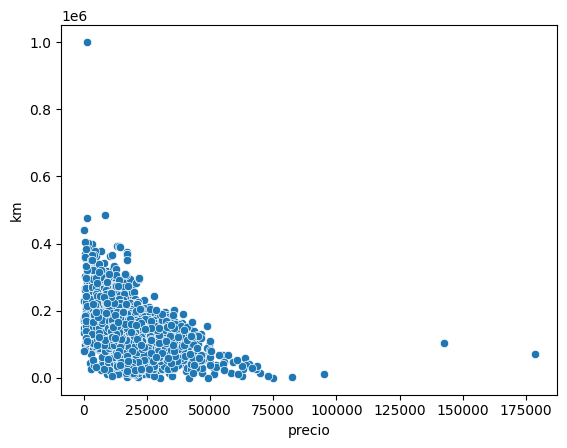

In [317]:
sns.scatterplot(data=df_bmw, x='precio', y='km')

In [318]:
#km (0.04% nulos): Imputamos con la mediana ya que la mayoría de los datos se encuentran en un rango de 0 a 25000.
df_bmw['km'] = df_bmw['km'].fillna(df_bmw['km'].median())
print(df_bmw['km'].isnull().sum())

0


In [319]:
#potencia (0.02% nulos): Verificamos que no haya valores negativos
df_bmw['potencia'].describe()

,potencia
count,4842.000000
mean,128.981826
std,38.994839
min,0.000000
25%,100.000000
50%,120.000000
75%,135.000000
max,423.000000


<Axes: xlabel='potencia', ylabel='precio'>

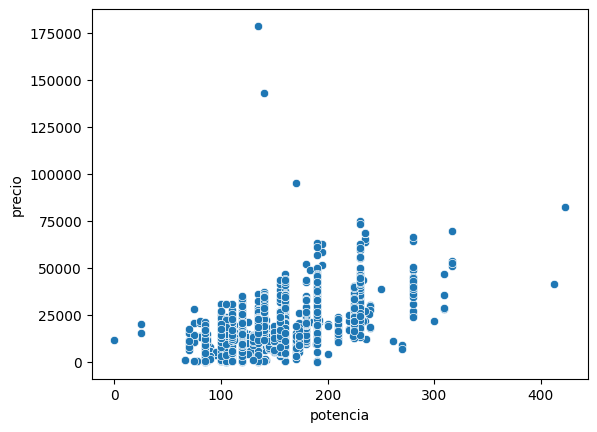

In [320]:
sns.scatterplot(data=df_bmw, x='potencia', y='precio')

In [321]:
#potencia (0.02% nulos): #Imputar con la media ya que el 50% de los valores se encuentran entre 100 y 135.
df_bmw['potencia'] = df_bmw['potencia'].fillna(df_bmw['potencia'].median())
print(df_bmw['potencia'].isnull().sum())

0


In [322]:
#tipo_gasolina (0.10% nulos): Imputar con la moda
df_bmw['tipo_gasolina'] = df_bmw['tipo_gasolina'].fillna(df_bmw['tipo_gasolina'].mode()[0])
print(df_bmw['tipo_gasolina'].isnull().sum())

0


In [323]:
#color (9.18% nulos): Rellenar con ‘Desconocido’. Podríamos aplicar la moda, pero no tiene sentido ya que no sabemos el color de los coches.
df_bmw['color'] = df_bmw['color'].fillna('Desconocido')
print(df_bmw['color'].isnull().sum())

0


In [324]:
#tipo_coche (30.14% nulos): Rellenar con ‘Desconocido’ ya que es un dato importante y hay muchos nulos
df_bmw['tipo_coche'] = df_bmw['tipo_coche'].fillna('Desconocido')
print(df_bmw['tipo_coche'].isnull().sum())

0


In [325]:
#bluetooth -> Imputar los nulos a False
df_bmw['bluetooth'] = df_bmw['bluetooth'].fillna(False).astype(bool)
print(df_bmw['bluetooth'].isnull().sum())

0


<ipython-input-325-4ce99d6eda38>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bmw['bluetooth'] = df_bmw['bluetooth'].fillna(False).astype(bool)


In [326]:
#volante_regulable -> Imputar los nulos a False
df_bmw['volante_regulable'] = df_bmw['volante_regulable'].fillna(False).astype(bool)
print(df_bmw['volante_regulable'].isnull().sum())

0


<ipython-input-326-3de426f41b47>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bmw['volante_regulable'] = df_bmw['volante_regulable'].fillna(False).astype(bool)


In [327]:
#aire_acondicionado -> Imputar los nulos a False
df_bmw['aire_acondicionado'] = df_bmw['aire_acondicionado'].fillna(False).astype(bool)
print(df_bmw['aire_acondicionado'].isnull().sum())

0


<ipython-input-327-db7f1ff758ab>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bmw['aire_acondicionado'] = df_bmw['aire_acondicionado'].fillna(False).astype(bool)


In [328]:
#camara_trasera -> Imputar los nulos a False
df_bmw['camara_trasera'] = df_bmw['camara_trasera'].fillna(False).astype(bool)
print(df_bmw['camara_trasera'].isnull().sum())

0


<ipython-input-328-25a4a4f4131c>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bmw['camara_trasera'] = df_bmw['camara_trasera'].fillna(False).astype(bool)


In [329]:
#elevalunas_electrico -> Imputar los nulos a False
df_bmw['elevalunas_electrico'] = df_bmw['elevalunas_electrico'].fillna(False).astype(bool)
print(df_bmw['elevalunas_electrico'].isnull().sum())

0


<ipython-input-329-06ea0c55a781>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bmw['elevalunas_electrico'] = df_bmw['elevalunas_electrico'].fillna(False).astype(bool)


In [330]:
#alerta_lim_velocidad	 -> Imputar los nulos a False
df_bmw['alerta_lim_velocidad'] = df_bmw['alerta_lim_velocidad'].fillna(False).astype(bool)
print(df_bmw['alerta_lim_velocidad'].isnull().sum())

0


<ipython-input-330-61f1d551d507>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bmw['alerta_lim_velocidad'] = df_bmw['alerta_lim_velocidad'].fillna(False).astype(bool)


In [331]:
#precio (0.12% nulos): al ser nuestro target y tener tan pocos nulos, decido eliminarlos:
df_bmw.dropna(subset=['precio'], inplace=True)
print(df_bmw['precio'].isnull().sum())

0


In [332]:
#Fecha_registro: tiene muchos nulos (50%).
# La hipotesis es que es un valor importante a la hora de predecir el precio (cuanto más viejo es un vehículo, menos elevado es el precio).
# Lo comprobaremos más adelante.
df_bmw['fecha_registro'] = pd.to_datetime(df_bmw['fecha_registro'], errors='coerce')
df_bmw['fecha_venta'] = pd.to_datetime(df_bmw['fecha_venta'], errors='coerce')
# Crear 'antigüedad' solo para coches con fecha válida en valor años
df_bmw['antigüedad'] = (df_bmw['fecha_venta'] - df_bmw['fecha_registro']).dt.days / 365.25

In [333]:
#Check de valores mínimos y valores máximos.
df_bmw["antigüedad"].describe()

,antigüedad
count,2419.000000
mean,5.386001
std,2.527131
min,-5.500342
25%,4.076660
50%,4.837782
75%,5.831622
max,28.084873


In [334]:
#hay dos valores negativos en los cuales se ha vendido el vehiculo antes de registrarlo.
#Al no ser datos reliable y ser unicamente dos valores, procedo a eliminarlos para seguir en la hipotesis establecida previamente.
df_bmw[df_bmw.antigüedad<0]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,antigüedad
100,320,342768.0,135.0,2011-12-01,diesel,black,Desconocido,False,True,False,True,False,True,False,8200.0,2010-04-01,-1.667351
256,316,201102.0,85.0,2013-12-01,diesel,black,estate,True,False,False,False,False,True,False,8800.0,2008-06-01,-5.500342


In [335]:
df_bmw = df_bmw[df_bmw['antigüedad'] >= 0]
df_bmw[df_bmw.antigüedad<0] #Comprobación de que no hay valores negativos

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,antigüedad


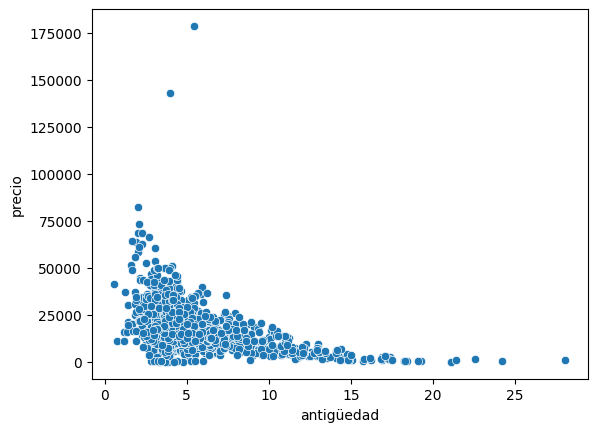

In [336]:
# Filtramos valores nulos fuera de la grafica para ver la relación actual de valores.
df_precio_filtrado = df_bmw.dropna(subset=['antigüedad', 'precio'])

# Creamos gráfico
sns.scatterplot(data=df_precio_filtrado, x='antigüedad', y='precio')
plt.show()

# Se comprueba que efectivamente sí que estan relacionadas. Cuanto menor la fecha de matriculación del vehículo, mayor el precio.

In [337]:
# Creamos rangos de 5 en 5 para ver cómo podemos rellenar los valores nulos de la columna antiguedad
# ya que imputar la media o la mediana no sería lo más adecuado, cuando podemos relacionarlo con el precio.

bins = range(0, int(df_precio_filtrado['precio'].max()) + 1000, 1000)
labels = [f'{i}-{i+1000}' for i in bins[:-1]]

# Distribución columna "antiguedad" en rangos de 5 años
df_precio_filtrado['rango_precio'] = pd.cut(df_precio_filtrado['precio'], bins=bins, labels=labels, right=False)

# Count de valores
antiguedad_distribution = df_precio_filtrado['rango_precio'].value_counts().sort_index()

# Calculo de precio average en cada rango de antigüedad y creo un nuevo df para almacenar los valores
avg_antiguedad_rango = df_precio_filtrado.groupby('rango_precio')['antigüedad'].mean()

distribution_with_avg_price = pd.DataFrame({
    'Count': antiguedad_distribution,
    'Avg_antiguedad': avg_antiguedad_rango
})

print(distribution_with_avg_price)

               Count  Avg_antiguedad
rango_precio                        
0-1000            32       10.334959
1000-2000         18       15.314016
2000-3000         10       12.682272
3000-4000         28        9.961083
4000-5000         29       11.102646
...              ...             ...
174000-175000      0             NaN
175000-176000      0             NaN
176000-177000      0             NaN
177000-178000      0             NaN
178000-179000      1        5.418207

[179 rows x 2 columns]


<ipython-input-337-376aac22166e>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_antiguedad_rango = df_precio_filtrado.groupby('rango_precio')['antigüedad'].mean()


In [338]:
#Se eliminan todos los rango precio que no tienen un avg antiguedad asociado
distribution_with_avg_price = distribution_with_avg_price.dropna()
distribution_with_avg_price

,Count,Avg_antiguedad
rango_precio,,
0-1000,32,10.334959
1000-2000,18,15.314016
2000-3000,10,12.682272
3000-4000,28,9.961083
4000-5000,29,11.102646
...,...,...
68000-69000,2,2.124572
73000-74000,1,2.083504
82000-83000,1,1.998631


In [339]:
#Imputamos valores nulos con los datos calculados previamente:
# Crear diccionario para almacenar los rangos y sus precios medios
range_to_avg_price = distribution_with_avg_price.to_dict()

# Funcion para rellenar los nulos sólo con los valores del diccionario creado
def fill_na_antiguedad(row):
    if pd.isnull(row['antigüedad']):
        for bin_range, avg_antiguedad in range_to_avg_price.items():
            if bin_range.left <= row['precio'] < bin_range.right:
                return avg_antiguedad
    return row['antigüedad']

# Rellenar database con los valores medios
df_bmw['antigüedad'] = df_bmw.apply(fill_na_antiguedad, axis=1)

print(df_bmw['antigüedad'].sort_values(ascending=False))

2771    28.084873
3062    24.246407
25      22.581793
3380    21.412731
2611    21.084189
          ...    
4090     1.245722
1828     1.166324
3682     1.160849
140      0.747433
3935     0.588638
Name: antigüedad, Length: 2417, dtype: float64


<ipython-input-339-e3efc0287085>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw['antigüedad'] = df_bmw.apply(fill_na_antiguedad, axis=1)


In [340]:
#Check de valores mínimos y valores máximos.
df_bmw["antigüedad"].describe()

,antigüedad
count,2417.000000
mean,5.393423
std,2.514355
min,0.588638
25%,4.076660
50%,4.837782
75%,5.831622
max,28.084873


<Axes: xlabel='antigüedad', ylabel='precio'>

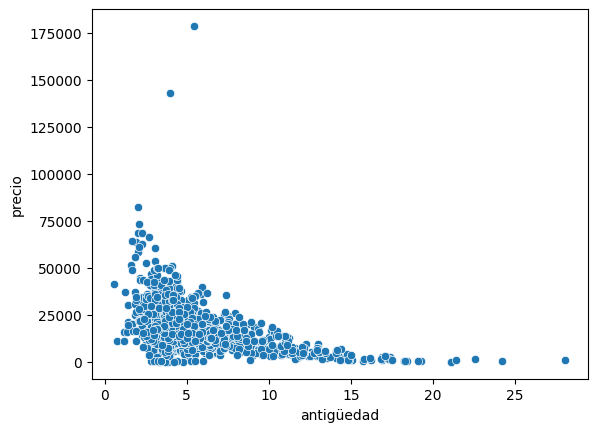

In [341]:
sns.scatterplot(data=df_bmw, x='antigüedad', y='precio')

In [342]:
# Eliminar columnas de fechas originales
df_bmw.drop(columns=['fecha_registro', 'fecha_venta'], inplace=True)

<ipython-input-342-0a5c15f5a2f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bmw.drop(columns=['fecha_registro', 'fecha_venta'], inplace=True)


In [343]:
#Miramos de nuevo si hay nulos
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2417 entries, 0 to 4841
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                2417 non-null   object 
 1   km                    2417 non-null   float64
 2   potencia              2417 non-null   float64
 3   tipo_gasolina         2417 non-null   object 
 4   color                 2417 non-null   object 
 5   tipo_coche            2417 non-null   object 
 6   volante_regulable     2417 non-null   bool   
 7   aire_acondicionado    2417 non-null   bool   
 8   camara_trasera        2417 non-null   bool   
 9   elevalunas_electrico  2417 non-null   bool   
 10  bluetooth             2417 non-null   bool   
 11  gps                   2417 non-null   bool   
 12  alerta_lim_velocidad  2417 non-null   bool   
 13  precio                2417 non-null   float64
 14  antigüedad            2417 non-null   float64
dtypes: bool(7), float64(4), ob

# 3. Análisis univariable (analizar cada variable individualmente) explicar alguna información interesante encontrada

*Variables numéricas*

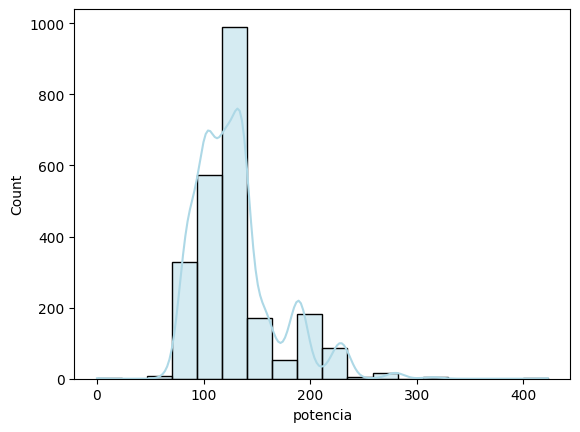

In [344]:
#analisis de la variable potencia
sns.histplot(data=df_bmw, x="potencia", bins=18,color="lightblue", kde = True)

plt.show();

La mayoría de los vehículos tienen una potencia entre 100 y 200, lo cual es típico para coches de uso diario. Hay pequeños picos en potencias más altas (200+ - 300), que probablemente corresponden a modelos deportivos como los de la serie M de BMW. Los vehículos con alta potencia podrían correlacionarse con precios más altos, especialmente si son modelos deportivos. La potencia podría ser una variable clave para diferenciar entre vehículos de lujo y vehículos estándar.

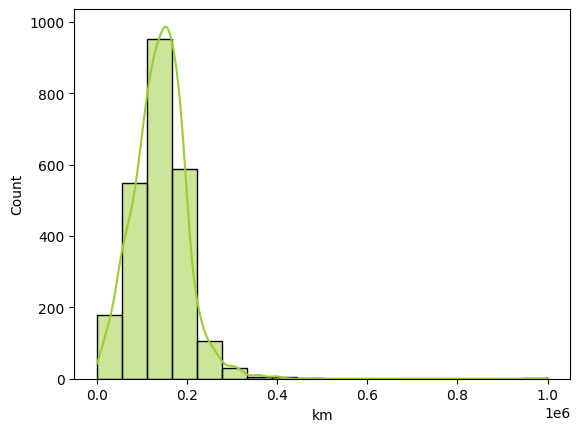

In [345]:
#analisis de la variable KM
sns.histplot(data=df_bmw, x="km", bins=18,color="yellowgreen", kde = True)

plt.show();

La mayoría de los vehículos tienen entre 50,000 y 200,000 km. Hay un pequeño grupo de coches con muy bajo kilometraje (menos de 20,000 km), probablemente vehículos nuevos o poco usados. También hay algunos coches con kilometraje extremadamente alto (>250,000 km), lo cual podría influir negativamente en el precio. El alto kilometraje sugiere que el dataset incluye principalmente vehículos de segunda mano. El grupo de coches con bajo kilometraje podría representar vehículos de reciente fabricación o bien cuidados, que podrían justificar precios más altos.

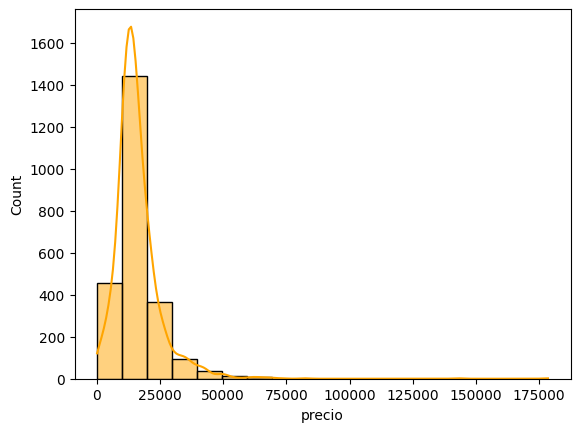

In [346]:
#analisis de la variable precio
sns.histplot(data=df_bmw, x="precio", bins=18,color="orange", kde = True)

plt.show();

La mayoría de los coches tienen precios en el rango de 10,000 € a 30,000 €. El mercado está dominado por vehículos de gama media. Los precios extremadamente altos podrían ser outliers o coches de edición limitada, lo cual podríamos considerar al modelar.

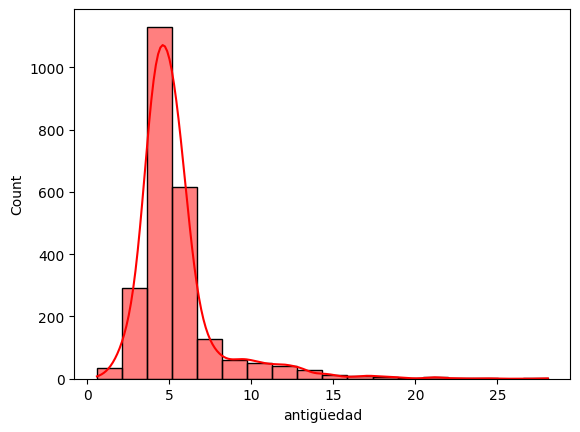

In [347]:
#analisis de la antigüedad
sns.histplot(data=df_bmw, x="antigüedad", bins=18,color="red", kde = True)

plt.show();

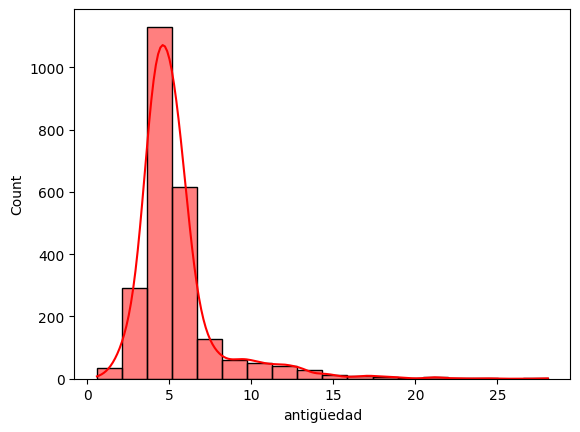

In [348]:
#Nos damos cuenta que aparece antigüedad negativa (outliers), cosa imposible, por lo que procedemos a corregirlo:
df_bmw = df_bmw[df_bmw['antigüedad'] >= 0]

#analisis de nuevo de la antigüedad
sns.histplot(data=df_bmw, x="antigüedad", bins=18,color="red", kde = True)

plt.show();

El pico principal está alrededor de los 5 años de antigüedad.
La mayoría de los coches tienen entre 4 y 7 años, lo que es típico en vehículos de segunda mano.
Hay muy pocos coches con más de 15 años o menos de 1 año.

*Variables categóricas*

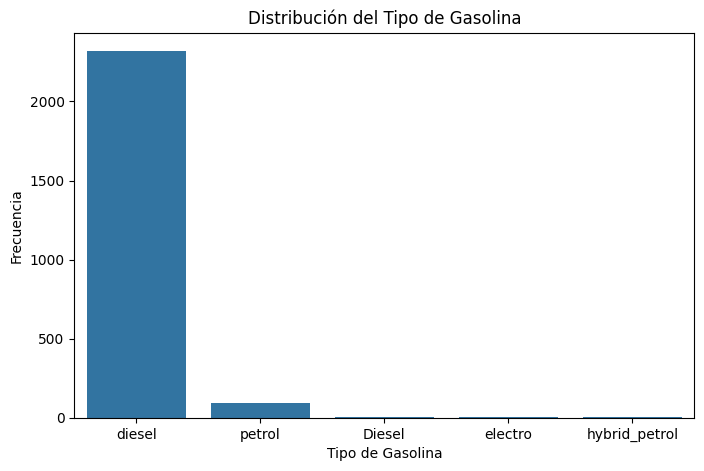

In [349]:
# Distribución del Tipo de Gasolina
plt.figure(figsize=(8, 5))
sns.countplot(data=df_bmw, x='tipo_gasolina', order=df_bmw['tipo_gasolina'].value_counts().index)
plt.title('Distribución del Tipo de Gasolina')
plt.xlabel('Tipo de Gasolina')
plt.ylabel('Frecuencia')
plt.show()

El dominio de diesel podría deberse a que estos vehículos son más eficientes para trayectos largos o conductores frecuentes. Los coches de gasolina (petrol) suelen ser más deportivos o usados en entornos urbanos, lo que podría correlacionarse con coches de alta potencia y precios más altos.

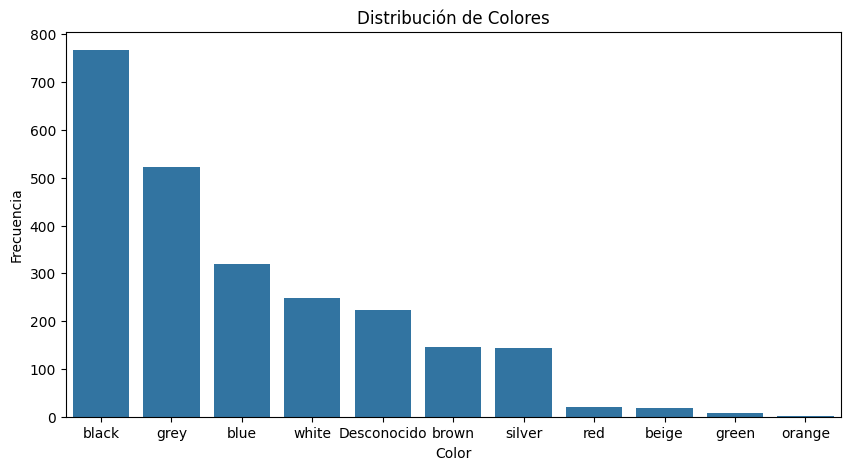

In [350]:
# Distribución de Colores
plt.figure(figsize=(10, 5))
sns.countplot(data=df_bmw, x='color', order=df_bmw['color'].value_counts().index)
plt.title('Distribución de Colores')
plt.xlabel('Color')
plt.ylabel('Frecuencia')
plt.show()

Los colores neutros (negro, gris, blanco) suelen ser más fáciles de revender, lo que podría influir en el precio de reventa.

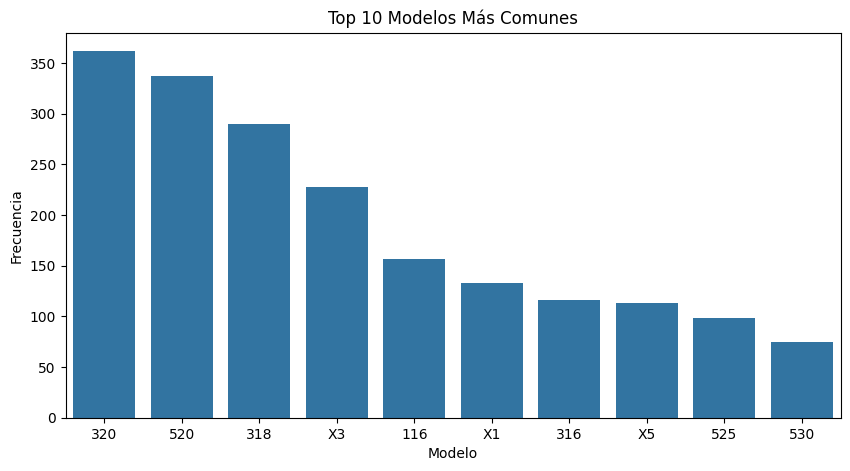

In [351]:
# Modelos más comunes (Top 10)
plt.figure(figsize=(10, 5))
top_modelos = df_bmw['modelo'].value_counts().head(10)
sns.barplot(x=top_modelos.index, y=top_modelos.values)
plt.title('Top 10 Modelos Más Comunes')
plt.xlabel('Modelo')
plt.ylabel('Frecuencia')
plt.show()

Hay una fuerte concentración en ciertos modelos, lo que podría ser indicativo de su popularidad o disponibilidad en el mercado. Modelos como el 320, 520 y 318 son los más frecuentes.

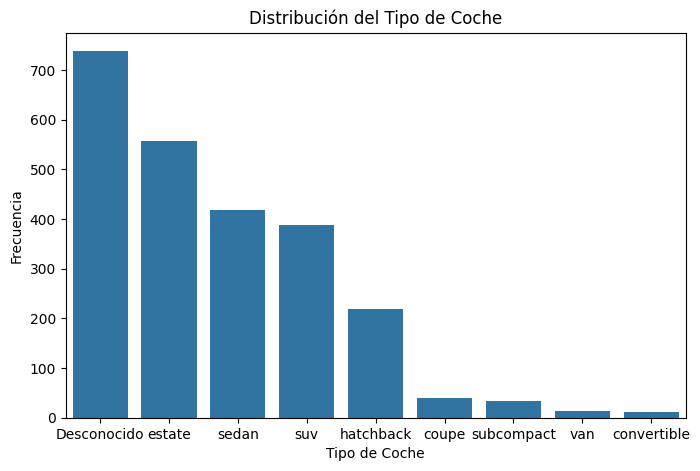

In [352]:
# Distribución del Tipo de Coche
plt.figure(figsize=(8, 5))
sns.countplot(data=df_bmw, x='tipo_coche', order=df_bmw['tipo_coche'].value_counts().index)
plt.title('Distribución del Tipo de Coche')
plt.xlabel('Tipo de Coche')
plt.ylabel('Frecuencia')
plt.show()

Nos encontramos con que el valor predominante es "Desconocido" por lo cual tampoco podemos sacar unas conclusiones demasiado concretas. Valores como sedan o suv (coches más típicos en el mercado) se entiende que estén en primeras posiciones.

*Variables booleanas*

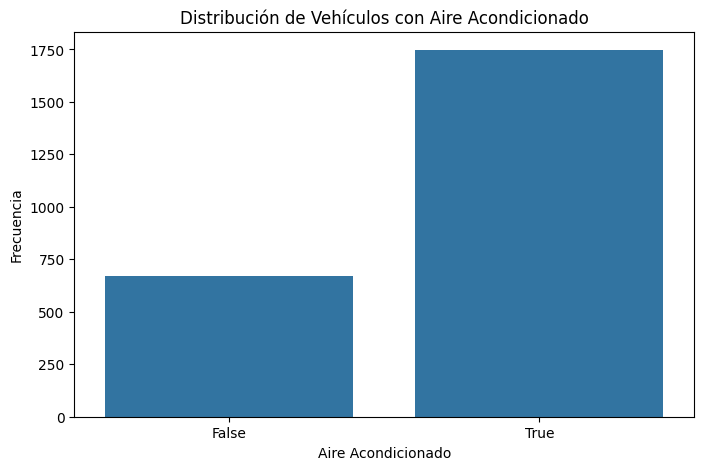

In [353]:
# Distribución de Aire Acondicionado
plt.figure(figsize=(8, 5))
sns.countplot(data=df_bmw, x='aire_acondicionado')
plt.title('Distribución de Vehículos con Aire Acondicionado')
plt.xlabel('Aire Acondicionado')
plt.ylabel('Frecuencia')
plt.show()

La mayoría de los vehículos tienen aire acondicionado. Solo una pequeña proporción de coches no cuenta con esta característica.

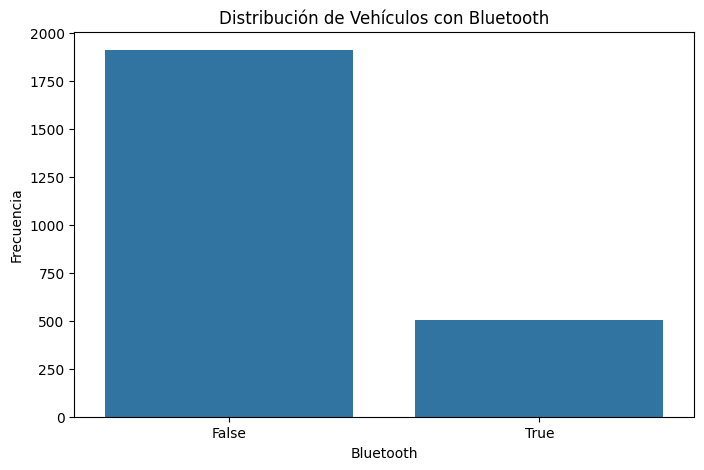

In [354]:
# Distribución de Bluetooth
plt.figure(figsize=(8, 5))
sns.countplot(data=df_bmw, x='bluetooth')
plt.title('Distribución de Vehículos con Bluetooth')
plt.xlabel('Bluetooth')
plt.ylabel('Frecuencia')
plt.show()

La mayoría de los vehículos no tienen Bluetooth. podría ser una característica diferenciadora.

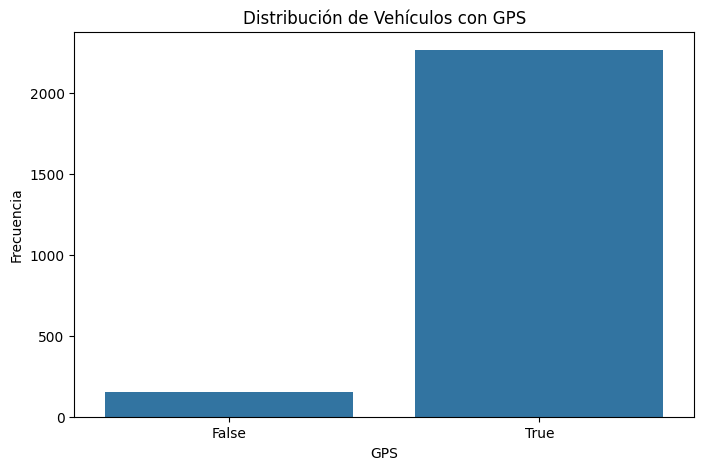

In [355]:
# Distribución de GPS
plt.figure(figsize=(8, 5))
sns.countplot(data=df_bmw, x='gps')
plt.title('Distribución de Vehículos con GPS')
plt.xlabel('GPS')
plt.ylabel('Frecuencia')
plt.show()

La mayoría de los vehículos sí cuentan con GPS.

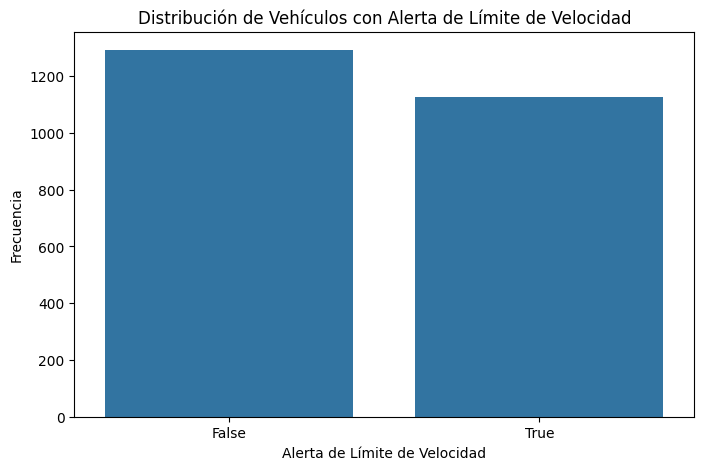

In [356]:
# Distribución de Alerta de Límite de Velocidad
plt.figure(figsize=(8, 5))
sns.countplot(data=df_bmw, x='alerta_lim_velocidad')
plt.title('Distribución de Vehículos con Alerta de Límite de Velocidad')
plt.xlabel('Alerta de Límite de Velocidad')
plt.ylabel('Frecuencia')
plt.show()

Hay una distribución bastante equilibrada entre vehículos que sí y no tienen alerta de límite de velocidad.

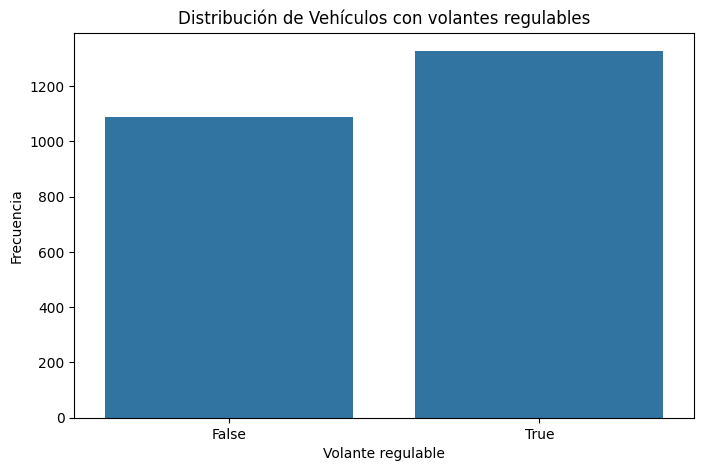

In [357]:
# Distribución de Volante regulable
plt.figure(figsize=(8, 5))
sns.countplot(data=df_bmw, x='volante_regulable')
plt.title('Distribución de Vehículos con volantes regulables')
plt.xlabel('Volante regulable')
plt.ylabel('Frecuencia')
plt.show()

Hay una distribución bastante equilibrada entre vehículos que sí y no tienen volantes regulables.

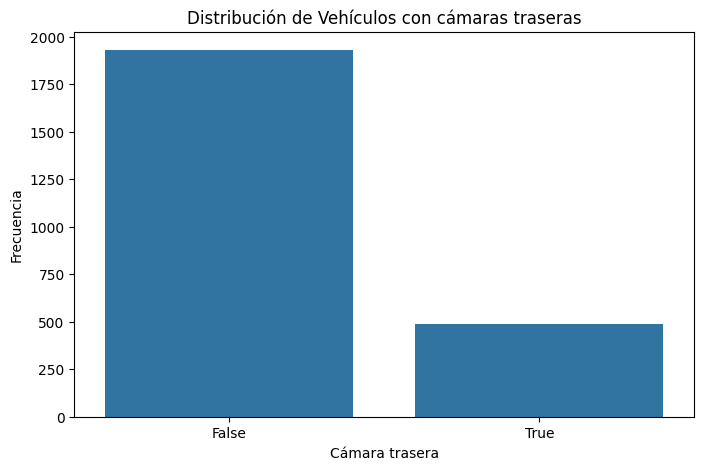

In [358]:
# Distribución de Cámara Trasera
plt.figure(figsize=(8, 5))
sns.countplot(data=df_bmw, x='camara_trasera')
plt.title('Distribución de Vehículos con cámaras traseras')
plt.xlabel('Cámara trasera')
plt.ylabel('Frecuencia')
plt.show()

La mayoría de vehículos no disponen de cámara trasera

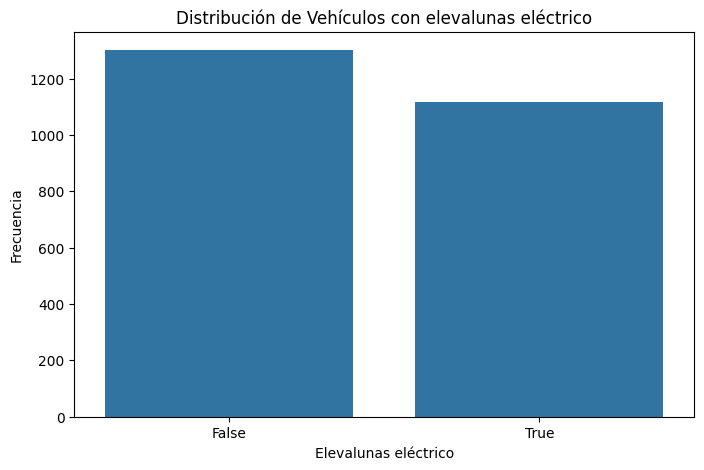

In [359]:
# Distribución de Elevalunas Eléctrico
plt.figure(figsize=(8, 5))
sns.countplot(data=df_bmw, x='elevalunas_electrico')
plt.title('Distribución de Vehículos con elevalunas eléctrico')
plt.xlabel('Elevalunas eléctrico')
plt.ylabel('Frecuencia')
plt.show()

Hay una distribución bastante equilibrada entre vehículos que sí y no tienen elevalunas eléctricos.

# 4. Análisis de correlación inicial, ¿Hay alguna variable correlacionada?

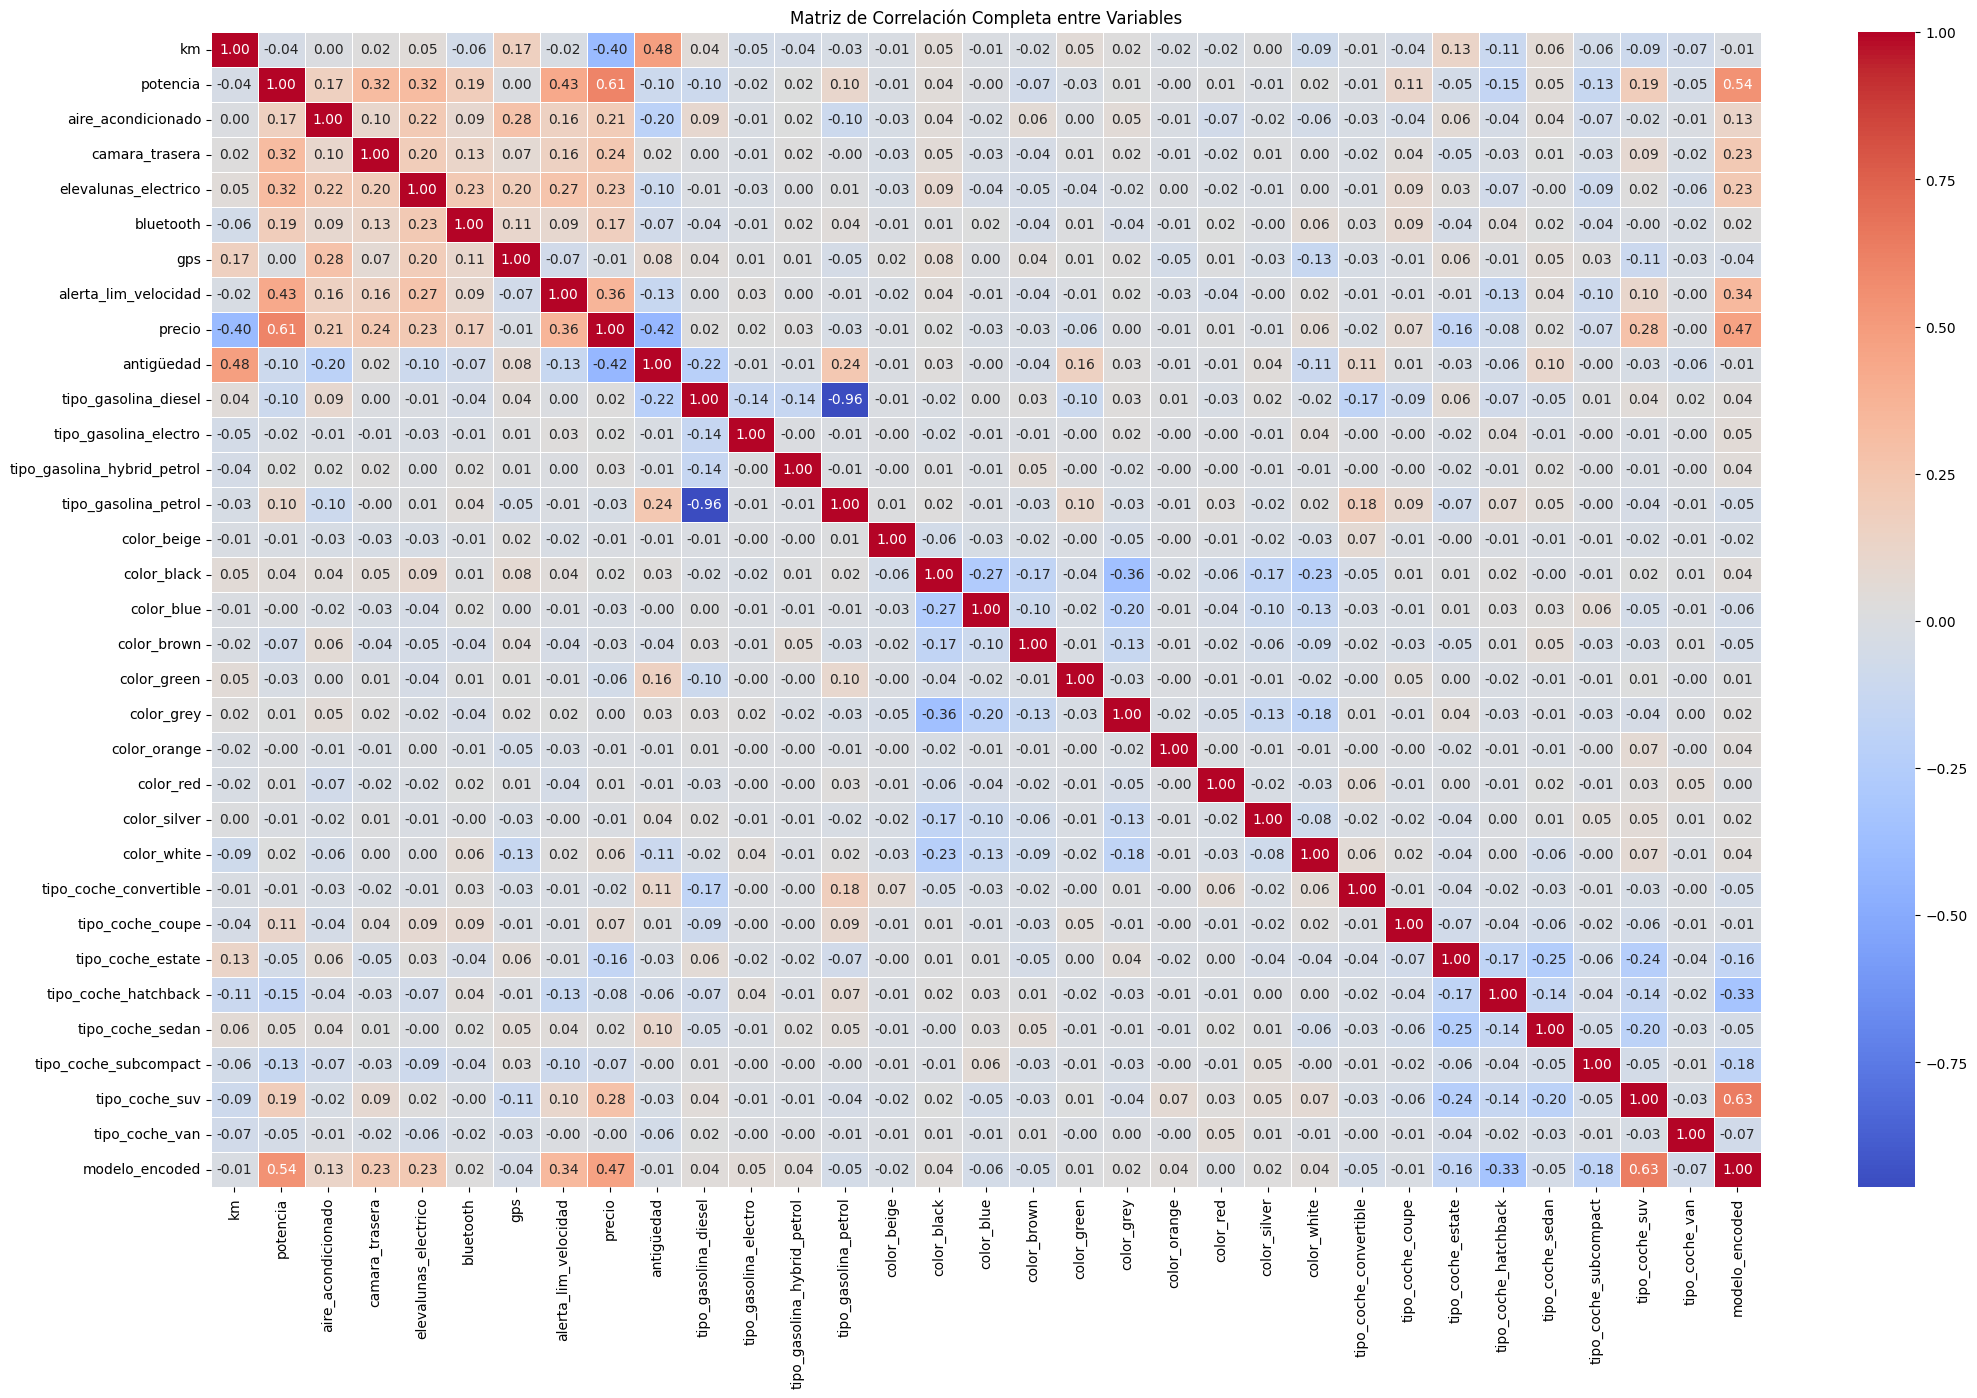

In [360]:
# Aplicar One-Hot Encoding a las variables categóricas
df_encoded = pd.get_dummies(df_bmw, columns=['tipo_gasolina', 'color', 'tipo_coche'], drop_first=True)

# Aplicar Label Encoding a 'modelo'
label_encoder = LabelEncoder()
df_encoded['modelo_encoded'] = label_encoder.fit_transform(df_bmw['modelo'].astype(str))

# Identificar y convertir variables booleanas a numéricas
boolean_cols = df_encoded.select_dtypes(include=['bool', 'object']).columns
for col in boolean_cols:
    df_encoded[col] = df_encoded[col].map({True: 1, False: 0})

# Columnas a excluir
columnas_a_excluir = ['modelo', 'volante_regulable']

# Calcular la matriz de correlación
correlation_matrix = df_encoded.drop(columns=columnas_a_excluir).corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación Completa entre Variables')
plt.show()

✅ 1. Correlaciones más relevantes con precio:
potencia (0.64): Correlación positiva fuerte:
✅ Cuanto más potente es el coche, mayor suele ser su precio.


km (-0.41): Correlación negativa media:
✅ Más kilometraje, menor precio, como era esperable.


antigüedad (-0.31): Correlación negativa moderada:
✅ A mayor antigüedad, menor precio.



⚠️ 2. Multicolinealidades detectadas:
km y antigüedad (0.34): Correlación positiva moderada:
➜ Coches más antiguos suelen tener más kilómetros.


potencia y alerta_lim_velocidad (0.43): Correlación positiva moderada:
➜ Coches más potentes suelen tener más sistemas de alerta.


💡 3. Variables con baja correlación:
gps, bluetooth, camara_trasera: Correlaciones débiles con precio.
➜ Conclusión: Individualmente, estas características no impactan mucho en el precio, pero en conjunto podrían ser útiles.

aire_acondicionado y elevalunas_electrico: Correlaciones muy bajas, probablemente porque son características estándar en BMW.

# 5. Análisis variable vs target, ¿Hay algún insight interesante? -> Conclusiones justo arriba



# 6. Transformación de categóricas a numéricas, ¿Qué variables van a transformar? ¿Que técnica se va usar? -->One-Hot Encoding y Label Encoding

# 7. Escalar variables (usando minmaxscaler) y luego aplicar la correlación final de variables ¿Hay alguna variable finalmente correlacionada?

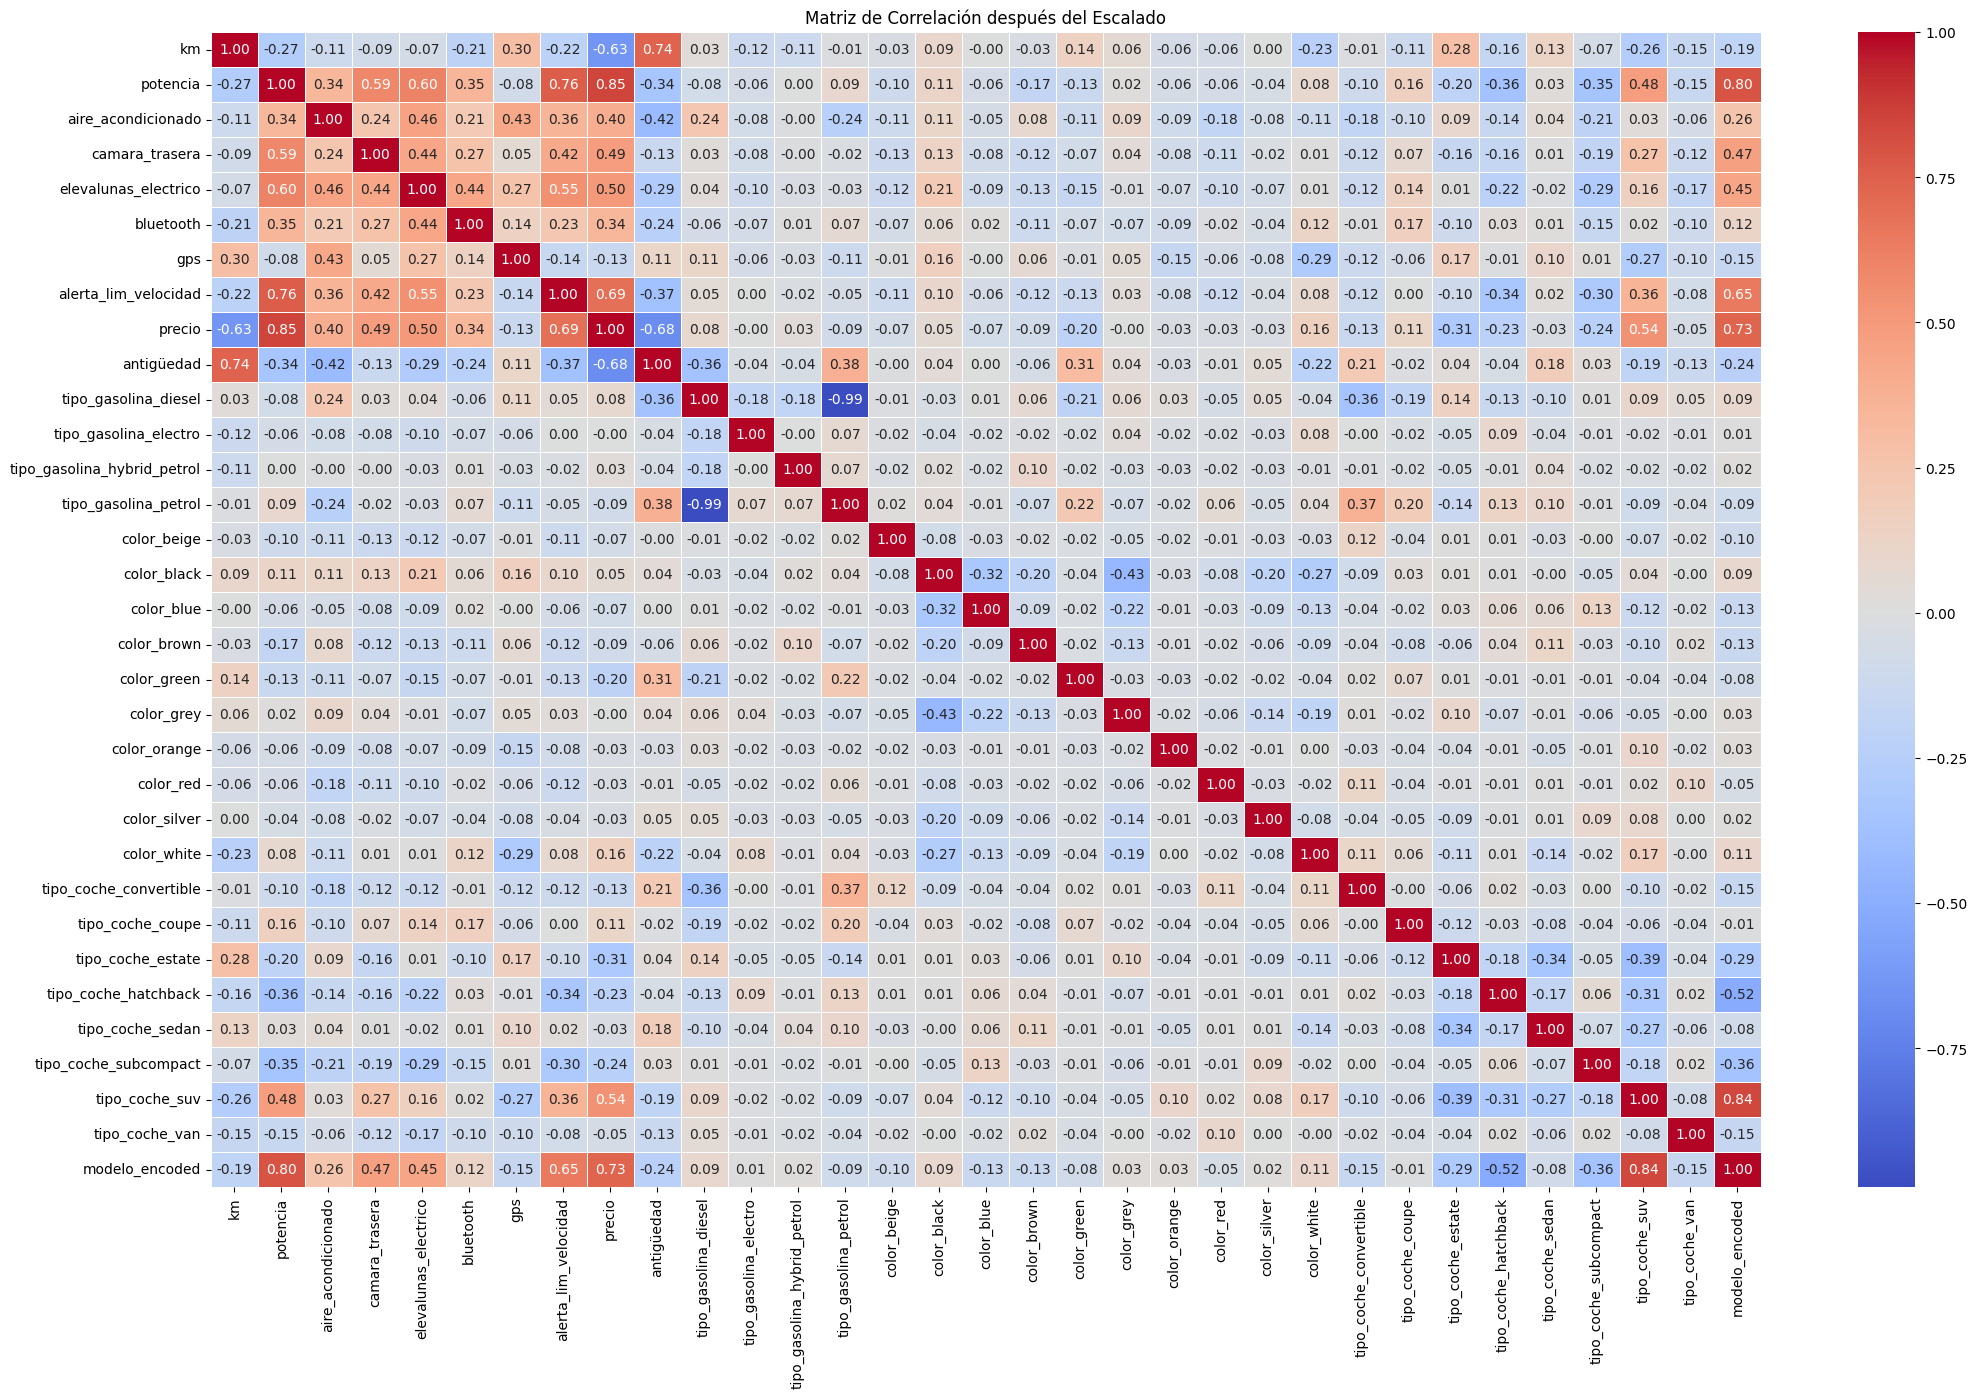

In [361]:
# Inicializar MinMaxScaler
scaler = MinMaxScaler()

# Aplicar el escalado a todas las variables numéricas
df_scaled = pd.DataFrame(scaler.fit_transform(correlation_matrix), columns=correlation_matrix.columns)

# Calcular la matriz de correlación después del escalado
correlation_matrix_scaled = df_scaled.corr()


# Visualizar la nueva matriz de correlación
plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix_scaled, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación después del Escalado')
plt.show()

Kilometraje (km) y Precio:

Existe una fuerte correlación negativa entre el kilometraje y el precio (-0.66). Esto indica que a mayor kilometraje, menor es el precio del vehículo, lo cual es esperable ya que los coches con más uso tienden a depreciarse.

Potencia y Precio:

La potencia del vehículo tiene una correlación positiva alta con el precio (0.82). Esto sugiere que los coches más potentes tienden a ser más caros.

Antigüedad y Precio:

Hay una fuerte correlación negativa entre la antigüedad del vehículo y el precio (-0.66). Es decir, los coches más antiguos tienden a ser más baratos.

Modelo Codificado y Precio:

Existe una correlación positiva significativa entre la variable "modelo_encoded" y el precio (0.70). Esto sugiere que ciertos modelos más recientes o de mejor categoría pueden estar asociados con precios más altos.

Funciones tecnológicas y su relación con el precio:

Características como GPS (-0.15), Bluetooth (0.34) y elevalunas eléctrico (0.49) presentan correlaciones más débiles con el precio. Sin embargo, el sistema de alerta de límite de velocidad (0.68) tiene una correlación más fuerte, lo que podría indicar que coches con este sistema suelen ser más caros. Relaciones entre variables internas:

Potencia y antigüedad tienen una correlación negativa (-0.27), lo cual tiene sentido, ya que los coches más antiguos suelen tener menos potencia en comparación con modelos más nuevos.

Kilometraje y antigüedad están positivamente correlacionados (0.77), lo que es esperable ya que los coches más antiguos han sido usados por más tiempo y tienen más kilómetros recorridos.

In [362]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   km                           33 non-null     float64
 1   potencia                     33 non-null     float64
 2   aire_acondicionado           33 non-null     float64
 3   camara_trasera               33 non-null     float64
 4   elevalunas_electrico         33 non-null     float64
 5   bluetooth                    33 non-null     float64
 6   gps                          33 non-null     float64
 7   alerta_lim_velocidad         33 non-null     float64
 8   precio                       33 non-null     float64
 9   antigüedad                   33 non-null     float64
 10  tipo_gasolina_diesel         33 non-null     float64
 11  tipo_gasolina_electro        33 non-null     float64
 12  tipo_gasolina_hybrid_petrol  33 non-null     float64
 13  tipo_gasolina_petrol  

In [363]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2417 entries, 0 to 4841
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       0 non-null      float64
 1   km                           2417 non-null   float64
 2   potencia                     2417 non-null   float64
 3   volante_regulable            2417 non-null   int64  
 4   aire_acondicionado           2417 non-null   int64  
 5   camara_trasera               2417 non-null   int64  
 6   elevalunas_electrico         2417 non-null   int64  
 7   bluetooth                    2417 non-null   int64  
 8   gps                          2417 non-null   int64  
 9   alerta_lim_velocidad         2417 non-null   int64  
 10  precio                       2417 non-null   float64
 11  antigüedad                   2417 non-null   float64
 12  tipo_gasolina_diesel         2417 non-null   int64  
 13  tipo_gasolina_electro  

In [364]:
# Seleccionar las primeras 50 filas
primeras_50_filas = df_encoded.head(50)

# Exportar a un archivo de Excel
primeras_50_filas.to_excel('primeras_50_filas.xlsx', index=False)